# CME 193 - Lecture 2
This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy

# Classes (Basic Section Start)

Classes let you abstract away details while programming.

In [ ]:
print(2 + 3)
print('2' + '3')

print([1,[2,3]] + [4, 5] ) # a.extend(b)

In [ ]:
x = []
x.append(2)
x

In [ ]:
type(x)

In [ ]:
class Animal:
    # constructor __init__
    def __init__(self, sound = 'NA'):
        self.sound_attribute = sound
        print(f"An Animal class with sound '{sound}' is created")
    # method
    def make_sound(self):
        print(f"Sound: {self.sound_attribute}")

    def set_sound(self, newsound):
        self.sound_attribute = newsound

In [ ]:
cat = Animal(sound = 'Meow')
dog = Animal(sound = 'Bark')

In [ ]:
cat = Animal()

In [ ]:
cat.set_sound('MMMM')

In [ ]:
cat.make_sound()

In [ ]:
type(cat), type(dog)

In [ ]:
cat.make_sound()
dog.make_sound()

Python use `self` parameter to refer to instance attributes and methods of the class
- If an instance called its class method, the method will treat the first arguments as the reference to the instance
  - `instance.method(args) = class.method(instance,args)`
- `self` refers to the instance of the class (python norm)



In [ ]:
#instance.method(args) = class.method(instance,args)

In [ ]:
print("class.method(instance,args):\n")
Animal.make_sound(cat)
Animal.make_sound(dog)

# instance.method(args) = class.method(instance,args)
print("\n\ninstance.method(args):\n")
cat.make_sound()
dog.make_sound()

In [ ]:
# instance.method(args) = class.method(instance, args)
'''
class list:
  def __init__(self, ...):
      ...
  def append(self, args):
      # append the args to the instance self
'''

x = []
list.append(x, 1) #class.method(instance, args)
x

# self argument equals to x
# self is the thing goes to the front of arguments
# can be replaced with anything, but it’s like a explicit rule in python

In [ ]:
# list class
x = []
print(type(x))
x.append(1) #instance.method(args)
x

## Bank Account example to illustrate Classes and Objects

In [ ]:
debits = []
credits = []

In [ ]:
def add_to_debits(debits_list, value):
    debits_list.append(value)

In [ ]:
def add_to_credits(credits_list, value):
    credits_list.append(value)

In [ ]:
add_to_debits(debits,10)
add_to_debits(debits,15)
add_to_debits(debits,100)

add_to_credits(credits, 100)

In [ ]:
debits

In [ ]:
credits

In [ ]:
def total_value(debits, credits):
    total =0
    for val in debits:
        total+=val
    for val in credits:
        total-=val
    return total

In [ ]:
total_value(debits, credits)

Problem -> Not Scale Up Well!  What if we have 100 users? What if each user needs another "saving account"?

## Lets use Classes and Objects

#### 1. Initialize a class

In [ ]:
class Account:
    def __init__(self):
      self.debits = []
      self.credits = []

In [ ]:
a1 = Account()
print(a1.debits)
print(a1.credits)

In [ ]:
a2 = Account()
print(a2.debits)
print(a2.credits)

#### 2. Add methods

In [ ]:
a1= {
    'debits' : [],
    'credits' : []
}

In [ ]:
class Account:
    # a class attributes
    accounts = []
    def __init__(self):
      # instance attributes
      self.debits = []
      self.credits = []

      # store all existing user account to a shared class attribute
      Account.accounts += [self]

    def add_to_credits(self, value):
      self.credits.append(value)

    def add_to_debits(self, value):
      self.debits.append(value)

    def total_value(self):
      total = 0
      total += sum(self.debits)
      total -= sum(self.credits)
      return total

In [ ]:
a1 = Account()
a2 = Account()

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}\n")

a1.add_to_credits(10)

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}")

In [ ]:
a1.add_to_debits(40)
a2.add_to_debits(10)

print(f"a1.debits:{a1.debits}")
print(f"a2.debits:{a2.debits}")

In [ ]:
print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

In [ ]:
Account.accounts

In [ ]:
a1.accounts.pop()

In [ ]:
a2.accounts

## (Basic Section End)

## Exercise 1 (2 min)

### Add more functionality to the account class

1. Add a check before credits account to ensure funds are available (make sure the total_value is always non-negative). Return True if it is a valid transaction, otherwise return False

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

In [ ]:
class Account:
    accounts = []
    def __init__(self):
      self.debits = []
      self.credits = []
      Account.accounts += [self]

    def add_to_credits(self, value):
      # TODO: implement 1.
      pass

    def add_to_debits(self, value):
      self.debits.append(value)

    def total_value(self):
      self.guess = 'Take a guess'
      total = 0
      total += sum(self.debits)
      total -= sum(self.credits)
      return total

    def transfer(self, other, value:int):
      # TODO: implement 2.
      pass

In [ ]:
# Test Code:
a1 = Account()
a2 = Account()
a1.add_to_credits(10)
a1.add_to_debits(40)
a2.add_to_debits(10)

print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

In [ ]:
a1.transfer(a2, 10)

In [ ]:
print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

## Example: Rational Numbers

Here we'l make a class that holds rational numbers (fractions).  That is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers

In [ ]:
import math
class Rational:
    def __init__(self, p, q=1):
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g # integer division
        self.q = q // g


    # method to convert rational to string for printing
    def __str__(self):
        return f'{self.p}/{self.q}, I am a rational number :-)'

    def __repr__(self): #printable representation
        return f'Rational({self.p}, {self.q}), :-('

    # method to convert rational to float
    def __float__(self):
        return self.p / self.q


In [ ]:
a = Rational(6, 4)
b = Rational(3, 2)

print(type(a))
print(f"a = {a}")
print(f"b = {b}")
print([a,b])
print(f"float(a) = {float(a)}")

In [ ]:
a + b
# We need Magic Method!!

## Plus Operation: `__add__`


In [ ]:
a = 2
b = 3
print(a + b)
#instance.method(args) = class.method(instance,args)
print(a.__add__(b))
print(int.__add__(a,b))

In [ ]:
# For example:
a = [1,2]
b = [3,4]
#a + b
print(a.__add__(b))
print(list.__add__(a,b))

## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [ ]:
import math
from typing import Union
class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)

    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    # method to add two rationals - interprets self + other
    def __add__(self, other: Union[Rational, int, float]):
        #Return whether an object is an instance of a class or of a subclass thereof.
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)

    def __radd__(self, other): # interprets other + self
       return self + other # addition commutes!


In [ ]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

In [ ]:
r3 = r1 + r2
print( type(r3) )
print( r3 )
print( float( r3 ))

In [ ]:
 #left add
print( r1 + 3 )

#Rational.__add__(self, other)

In [ ]:
#right add
print( 3 + r1 )

# (3).__add__(r1) if failed
# r1.__radd__(3)

# Exercise 2 (Post-Lecture)
More about magic method: Magic Method : https://python-course.eu/oop/magic-methods.php
### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__`
* `/` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.



In [ ]:
# YOUR CODE HERE

In [ ]:
# Write some examples to test your code

# Exercise 3 [Post Lecture]
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

### Algorithm

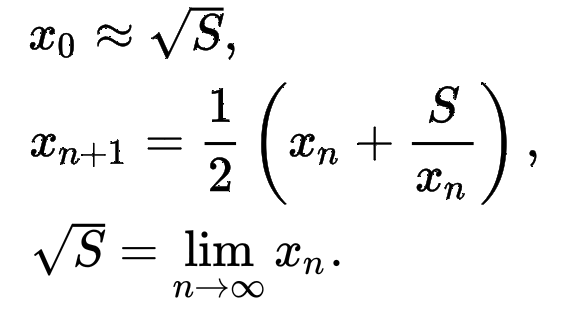

In [ ]:
def babylonian(S, num_iters=5):
    # TODO: Delete the raise error when implemented
    raise NotImplementedError('Not implemented yet')

In [ ]:
math.sqrt(24)

In [ ]:
babylonian(24)

In [ ]:
babylonian(Rational(24))

# NumPy
This is a good segue into NumPy. Python provides only a handful of numeric types: ints, longs, floats, and complex numbers. We just declared a class that implements rational numbers. NumPy implements one very useful numeric type: multidimensional arrays.

In [ ]:
# Quick note on importing
import math
math.sin(5)

In [ ]:
import math as m
m.sin(5)

In [ ]:
import numpy as np

In [ ]:
?np.array

In [ ]:
print([[0, 2], [1, 5]])

In [ ]:
x = np.array([[0, 2], [1, 5]])
print(type(x))
x

In [ ]:
y = np.array([[4, 0], [0, 4]])
y

In [ ]:
x + y

In [ ]:
x ** 2

In [ ]:
x * y  # Elementarywise multiplication

In [ ]:
x

In [ ]:
y

In [ ]:
x @ y  # Matrix multiplication after Python 3.5, traditional way: np.matmul()

In [ ]:
np.matmul(x,y)

In [ ]:
np.sum(x) # More method in the next lecture

### Why NumPy?
1. numpy optimize operation for numeric data
2. processes the tasks parallelly.
3. The NumPy package integrates C, C++ in Python. These programming languages have very little execution time compared to Python.

[Jupyter's magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [ ]:
%%timeit
x = list(np.random.rand(10000))
y = list(np.random.rand(10000))
z=0
for i in range(10000):
    z += x[i]*y[i]

In [ ]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = x@y

## NumPy functions for creating arrays

In [ ]:
?np.zeros

In [ ]:
X=np.zeros(shape = (5,10))
X

In [ ]:
X[1,2] = 1
X

In [ ]:
X.shape

In [ ]:
Y = np.ones(shape = (5,10))
Y

In [ ]:
?np.twos

In [ ]:
2*Y + 3

In [ ]:
R=np.random.rand(5,5)
R

In [ ]:
Rn = np.random.randn(5,5) #each number is a standard random normal variable (“standard normal” distribution)
Rn

In [ ]:
np.arange(1,100,2)

In [ ]:
x = []
for i in range(1,100,2):
  x.append(i)
print(x)

In [ ]:
np.linspace(1,99,51) #end value is inclusive!

In [ ]:
np.linspace(0,5,11)

In [ ]:
X = np.arange(48)
X

In [ ]:
X.reshape(6,8)

In [ ]:
X.reshape(2,3,8)

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

In [ ]:
# YOUR CODE HERE

# Plotting (Optional)

We will see some functions to do some quick plotting, we will come back to this library later.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB

In [ ]:
x = np.linspace(-5,5,100)
x

In [ ]:
y = x*x
y

In [ ]:
plt.plot(x,y)

In [ ]:
plt.plot(y)

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1","curve2"]) #add legend label
plt.xlabel("X label") #add x label
plt.ylabel("Y label") #add y label
plt.title("Title") #add title

Matplotlib Gallery: https://matplotlib.org/stable/plot_types/index  

Other plots template:
[seaborn](https://seaborn.pydata.org/examples/index.html)  

Interactive Plot:
[plotly](https://plotly.com/python/)

In [ ]:
# Multiple Subplots
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].plot(x,y)
ax[1,2].plot(x,y)